In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
!pip install minisom
from minisom import MiniSom

In [4]:
# Import the Iris dataset from sklearn
# Extract the data vectors and the target scalars
# Normalize the data vectors, using MinMaxScaler
# Declare a set of labels for each of the three classes of iris plants

dataset_iris = datasets.load_iris()
data_iris = dataset_iris.data
target_iris = dataset_iris.target
data_iris_normalized = MinMaxScaler().fit_transform(data_iris)
labels_iris = {1:'1', 2:'2', 3:'3'}
data = data_iris_normalized
target = target_iris

In [5]:
# initializing grid for SOM
SOM_X_AXIS_NODES = 8
SOM_Y_AXIS_NODES = 8
SOM_N_VARIABLES = data.shape[1]

In [6]:
ALPHA = 0.5
DECAY_FUNC = 'linear_decay_to_zero'
SIGMAO = 1.5
SIGMA_DECAY_FUNC = 'linear_decay_to_one'
NEIGHBORHOOD_FUNC = 'triangle'
DISTANCE_FUNC = 'euclidean'
TOPOLOGY = 'rectangular'
RANDOM_SEED = 123

In [8]:
som = MiniSom(
        SOM_X_AXIS_NODES,
        SOM_Y_AXIS_NODES,
        SOM_N_VARIABLES,
        sigma=SIGMAO,
        learning_rate=ALPHA,
        neighborhood_function=NEIGHBORHOOD_FUNC,
        activation_distance=DISTANCE_FUNC,
        topology=TOPOLOGY,
        sigma_decay_function = SIGMA_DECAY_FUNC,
        decay_function = DECAY_FUNC,
        random_seed=RANDOM_SEED,
        )

/usr/local/lib/python3.12/dist-packages/minisom.py:235: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +


In [9]:
"""
PCA initialization: Principal Component Analysis (PCA) initialization uses
the principal components of the input data to initialize the weights.
The initial weights of the neurons span the first two principal components.
This often leads to faster convergence.
"""
som.pca_weights_init(data)

/usr/local/lib/python3.12/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


In [10]:
N_ITERATIONS = 5000
som.train_random(data, N_ITERATIONS, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.055292768075146104


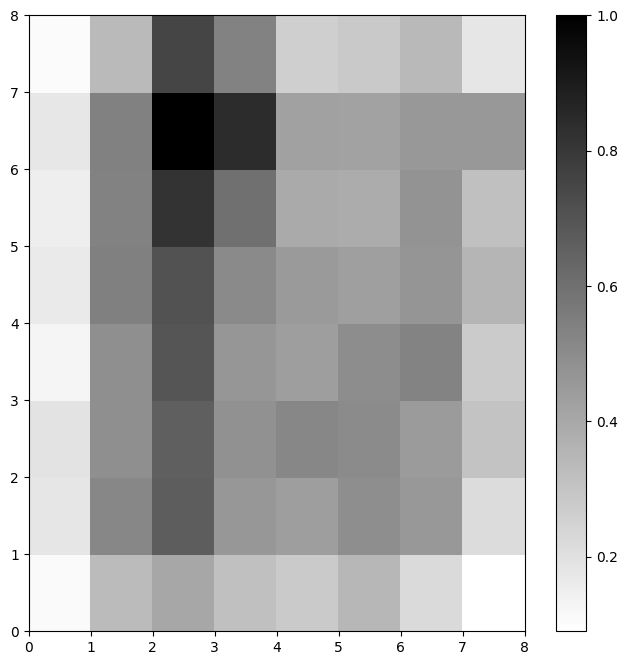

In [11]:
plt.figure(figsize= (8,8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()
plt.show()

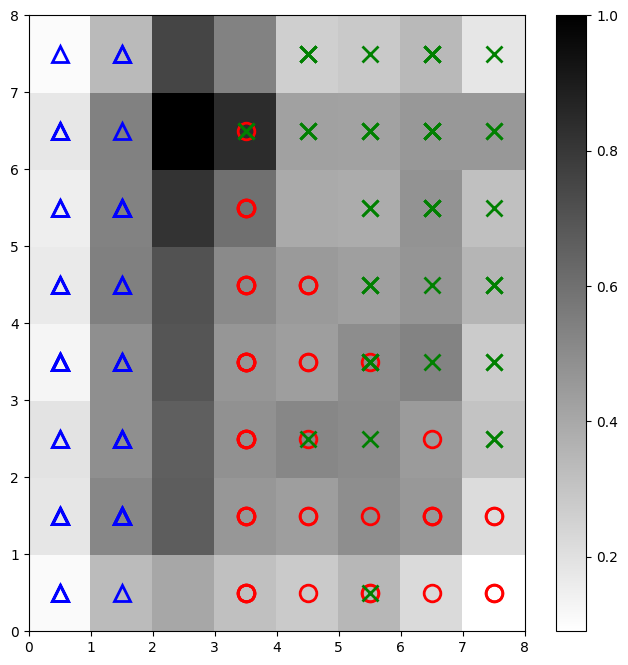

In [13]:
plt.figure(figsize= (8,8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()

markers = ['o','x','^']
colors = ['r','g','b']

for count, datapoint in enumerate(data):
    # get the winner
    w = som.winner(datapoint)
    # place a marker on the winning position for the sample data point
    plt.plot(w[0]+.5, w[1]+.5, markers[target[count]-1], markerfacecolor='None',
             markeredgecolor=colors[target[count]-1], markersize=12, markeredgewidth=2)
plt.show()

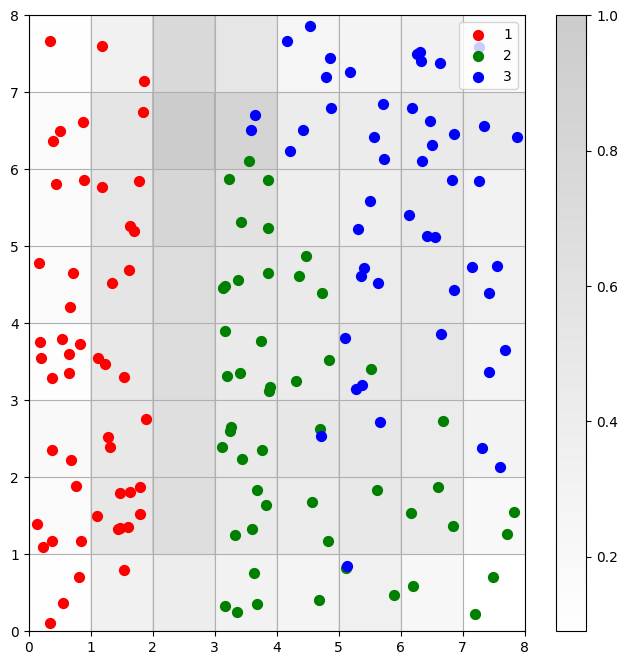

In [15]:
w_x = []
w_y = []
for i, x in enumerate(data):
    w = som.winner(x)
    w_x.append(w[0])
    w_y.append(w[1])

w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50,
                c=colors[c],
                label=labels_iris[c+1]
                )
plt.legend(loc='upper right')
plt.grid()
plt.show()